In [1]:
## Compare parameter values for EKI and history matching at iteration 1
import os
import glob
import csv


import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from cmcrameri import cm
plt.rcParams.update({'font.size': 22})

## Plot Results of EKI so far

In [10]:
N = 5
basedir = os.environ['GROUP_SCRATCH']+f"/EKI_N{N}/"
n_its = len(glob.glob(basedir+"iteration*")) -1
n_its

9

In [11]:
plotdir = f"{basedir}/PLOTS/"
os.makedirs(plotdir, exist_ok=True)
print(plotdir)

/scratch/groups/aditis2/EKI_N5//PLOTS/


In [12]:
params_files = [f"{basedir}/iteration_{n}/paramlist.csv" for n in range(0,n_its+1)]
params = [np.genfromtxt(params_file, delimiter=',', skip_header=1) for params_file in params_files]


param_arr = np.zeros((n_its+1, N, 2))
for i in range(n_its+1):
    param_arr[i] = params[i][:, 1:]

iter_ind = np.arange(n_its+1)

In [13]:
param_arr.shape, iter_ind.shape

((10, 5, 2), (10,))

## Parameters at each iteration
Here we make plots at each iteration of ``cw_tropics`` and ``Bt_eq``

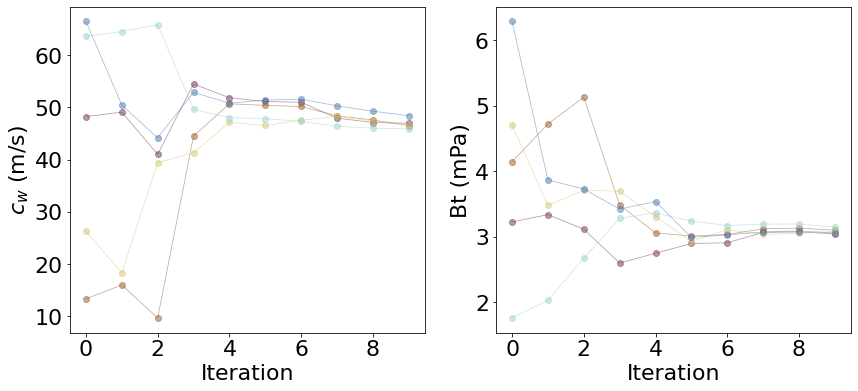

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
cmap = cm.romaO
norm = matplotlib.colors.Normalize(vmin=0, vmax=N)

for i in range(N):
    plt.sca(ax[0])
    plt.plot(iter_ind, param_arr[:, i, 0], 'o-', color = cmap(norm(i)), alpha=0.5, lw=0.8)
    plt.sca(ax[1])
    plt.plot(iter_ind, param_arr[:, i, 1]*1e3, 'o-', color = cmap(norm(i)), alpha=0.5, lw=0.8)

plt.sca(ax[0])
#plt.title("Half-width phase speed")
plt.ylabel("$c_w$ (m/s)")
plt.xlabel("Iteration")
plt.sca(ax[1])
#plt.title("Gravity wave stress")
plt.ylabel("Bt (mPa)")
plt.xlabel("Iteration")
plt.savefig(f"{plotdir}/parameters_each_iteration.png")

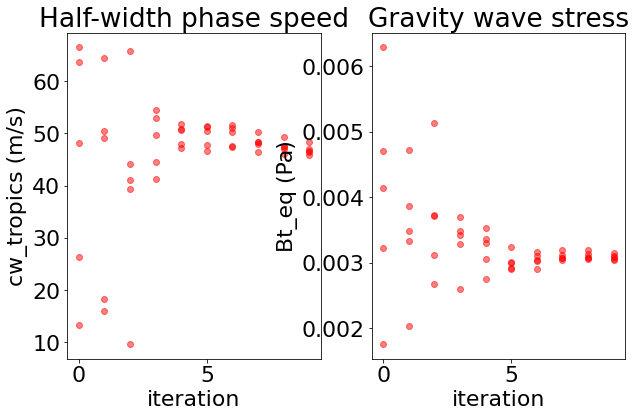

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

for i in range(N):
    plt.sca(ax[0])
    plt.plot(iter_ind, param_arr[:, i, 0], 'o', color="red", alpha=0.5)
    plt.sca(ax[1])
    plt.plot(iter_ind, param_arr[:, i, 1], 'o',  color="red", alpha=0.5)

plt.sca(ax[0])
plt.title("Half-width phase speed")
plt.ylabel("cw_tropics (m/s)")
plt.xlabel("iteration")
plt.sca(ax[1])
plt.title("Gravity wave stress")
plt.ylabel("Bt_eq (Pa)")
plt.xlabel("iteration")
plt.savefig(f"{plotdir}/parameters_each_iteration_points_only.png")

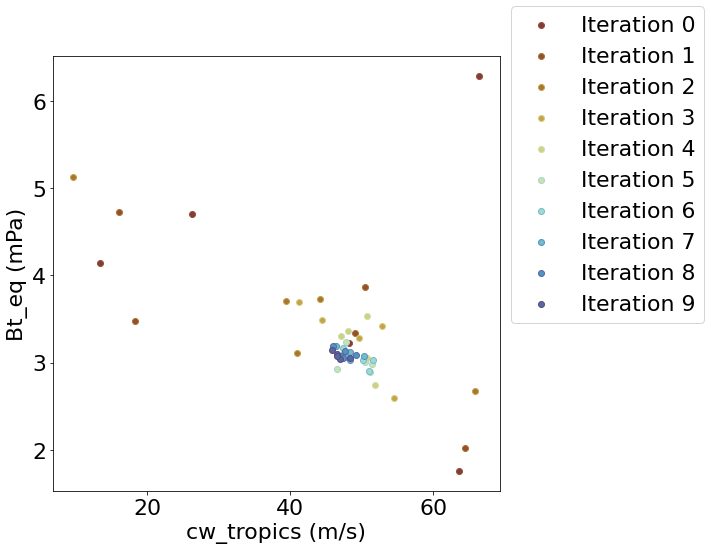

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
#cmap = plt.cm.Reds
norm = matplotlib.colors.Normalize(vmin=-1, vmax=n_its+2)
for i in range(n_its+1):
    plt.scatter(param_arr[i,:,0], param_arr[i,:,1]*1e3, color = cmap(norm(i)), 
                edgecolor=cmap(norm(i+1)), label=f"Iteration {i}")
plt.xlabel("cw_tropics (m/s)")
plt.ylabel("Bt_eq (mPa)")
#plt.legend(ncol=2, fontsize=16)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))

plt.savefig(f"{plotdir}/2d_parameters_each_iteration.png")

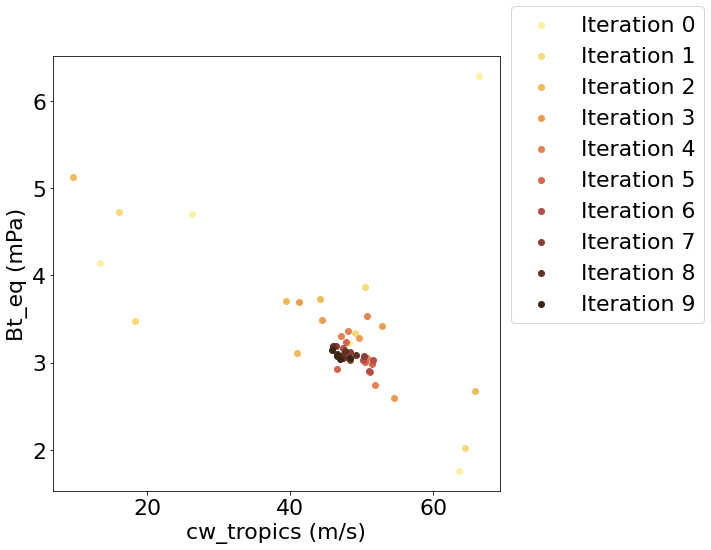

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
cmap = plt.cm.Reds
cmap = cm.lajolla
norm = matplotlib.colors.Normalize(vmin=-1, vmax=n_its+1)
for i in range(n_its+1):
    plt.scatter(param_arr[i,:,0], param_arr[i,:,1]*1e3, color = cmap(norm(i)), 
                label=f"Iteration {i}")
plt.xlabel("cw_tropics (m/s)")
plt.ylabel("Bt_eq (mPa)")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.savefig(f"{plotdir}/2d_parameters_each_iteration_EKI.png")

In [18]:
plotdir

'/scratch/groups/aditis2/EKI_N5//PLOTS/'

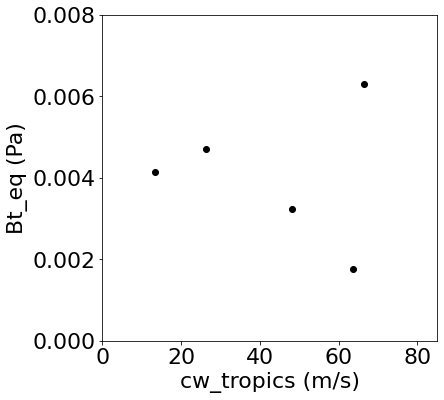

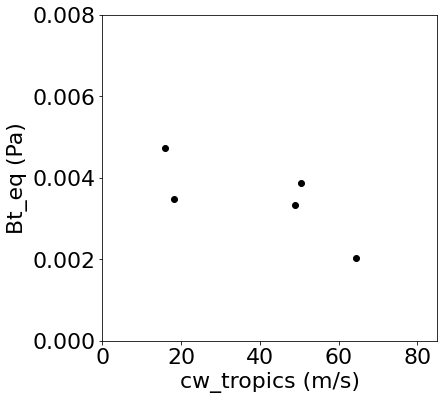

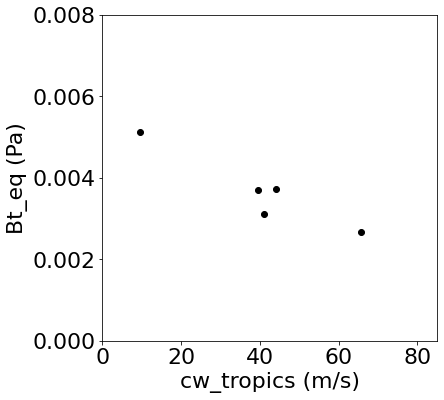

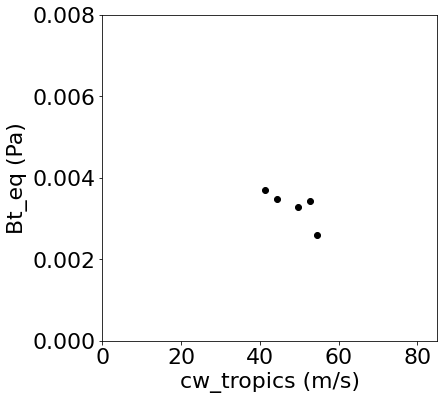

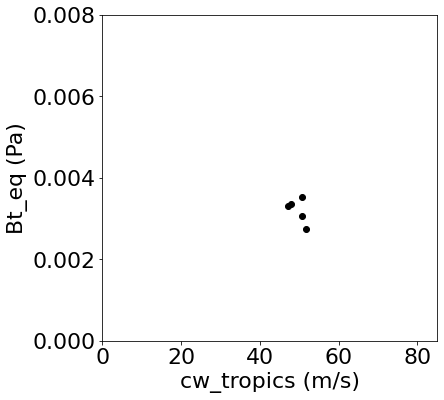

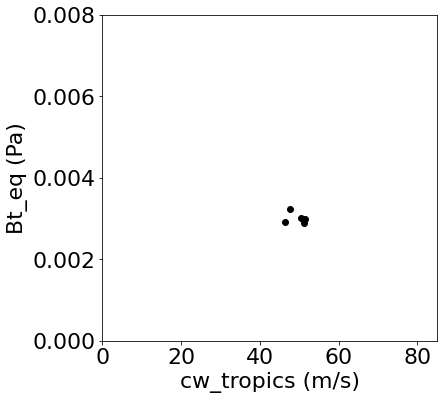

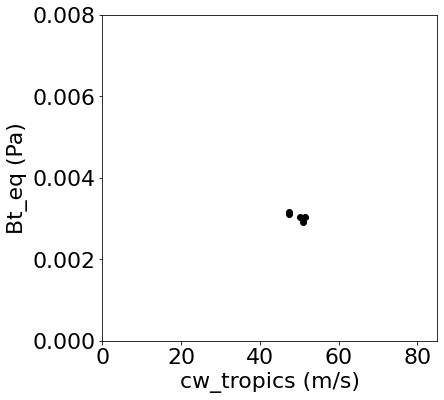

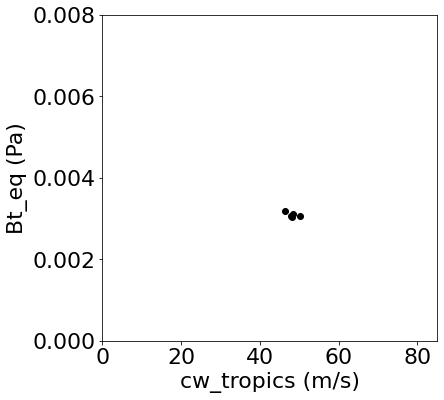

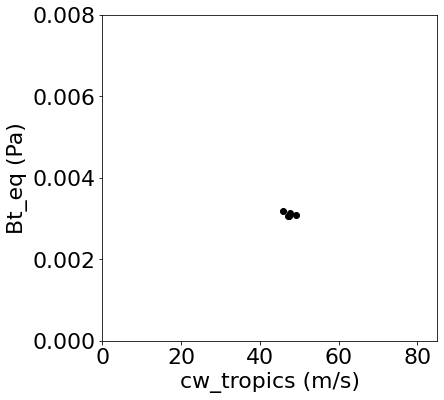

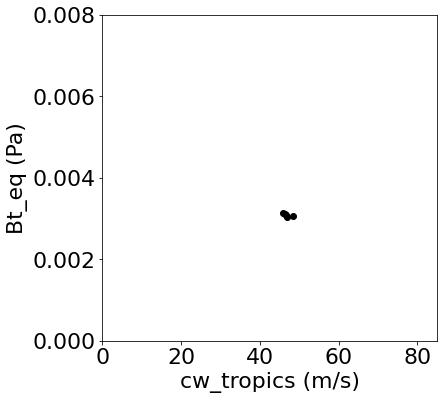

In [19]:
cmap = plt.cm.Reds
norm = matplotlib.colors.Normalize(vmin=-1, vmax=n_its+2)
for i in range(n_its+1):
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    plt.scatter(param_arr[i,:,0], param_arr[i,:,1], color = 'k')
    plt.axis(xmin=0, xmax=85, ymin=0.000, ymax=0.008 )
    plt.xlabel("cw_tropics (m/s)")
    plt.ylabel("Bt_eq (Pa)")
    plt.savefig(f"{plotdir}/2d_parameters_iteration_{i}.png")

## Plot QBO outputs
Here we plot how the QBO period and amplitude evolves at each iteration

In [36]:
## QBO files
QBO_dir = [f"{basedir}/iteration_{n}/" for n in range(0,n_its+1)]
QBO_arr = np.zeros((n_its, N, 2))

for i in range(n_its):
    for j in range(N):
        
        QBO_file = f"{QBO_dir[i]}{j}/QBO_TT_metrics.csv"
        
        try:
            QBO_vals = np.genfromtxt(QBO_file, delimiter=',', skip_header=1)
            QBO_arr[i, j] = QBO_vals[1:3]
        except:
            print("Could not find file", QBO_file)
            QBO_arr[i, j, :] = [np.nan, np.nan]


In [37]:
## Get QBO truth
truthdir = "/home/users/lauraman/EKI_OBS/ground_truth_data"
truth_filename = "QBO_TT_metrics_ground_truth.csv"

filepath_truth = f"{truthdir}/{truth_filename}"
QBO_truth = np.genfromtxt(filepath_truth, delimiter=',', skip_header=1)

In [38]:
## Get QBO truth
"""truthdir = "/home/users/lauraman/EKI_OBS/other_tests"
truth_filename = "QBO_TT_metrics_ground_truth_fullcov.csv"

filepath_truth = f"{truthdir}/{truth_filename}"
QBO_truth = np.genfromtxt(filepath_truth, delimiter=',', skip_header=1)"""

'truthdir = "/home/users/lauraman/EKI_OBS/other_tests"\ntruth_filename = "QBO_TT_metrics_ground_truth_fullcov.csv"\n\nfilepath_truth = f"{truthdir}/{truth_filename}"\nQBO_truth = np.genfromtxt(filepath_truth, delimiter=\',\', skip_header=1)'

In [39]:
QBO_truth

array([        nan, 27.91524902, 22.89785714,  0.7628561 ,  0.2469009 ,
        0.2469009 ,  0.28443237])

In [40]:
QBO_period_truth = QBO_truth[1]
QBO_amp_truth = QBO_truth[2]
QBO_period_sd = np.sqrt(QBO_truth[3])
QBO_amp_sd = np.sqrt(QBO_truth[-1])

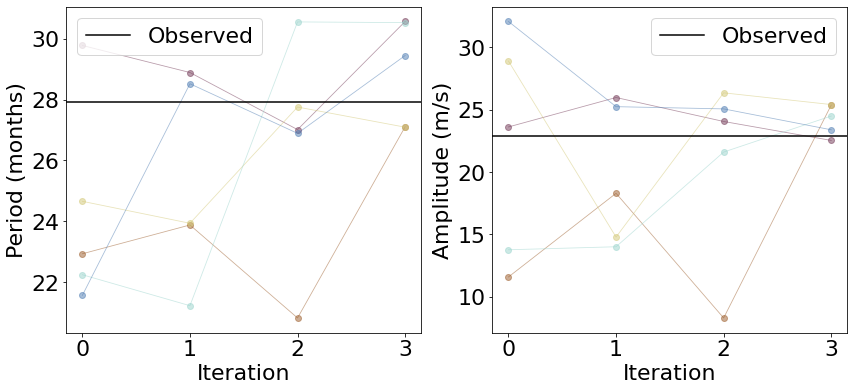

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
cmap = cm.romaO
norm = matplotlib.colors.Normalize(vmin=0, vmax=N)


for i in range(N):
    plt.sca(ax[0])
    plt.plot(iter_ind[:n_its], QBO_arr[:, i, 0], 'o-', color=cmap(norm(i)), alpha=0.5, lw=0.8)
    plt.sca(ax[1])
    plt.plot(iter_ind[:n_its], QBO_arr[:, i, 1], 'o-', color=cmap(norm(i)), alpha=0.5, lw=0.8)

plt.sca(ax[0])
#plt.title("QBO period")
plt.axhline(QBO_period_truth, color='k', linestyle='-', label="Observed")
#plt.axhline(QBO_period_truth+QBO_period_sd, color='k', linestyle='--', label="1 s.d.")
#plt.axhline(QBO_period_truth-QBO_period_sd, color='k', linestyle='--')

plt.ylabel("Period (months)")
#plt.axis(ymin=20, ymax=40)
plt.xlabel("Iteration")
plt.legend()

plt.sca(ax[1])
#plt.title("QBO amplitude")
plt.axhline(QBO_amp_truth, color='k',  linestyle='-', label="Observed")
#plt.axhline(QBO_amp_truth+QBO_amp_sd, color='k', linestyle='--', label="1 s.d.")
#plt.axhline(QBO_amp_truth-QBO_amp_sd, color='k', linestyle='--')

plt.ylabel("Amplitude (m/s)")
plt.xlabel("Iteration")
plt.legend()
plt.savefig(f"{plotdir}/outputs_each_iteration.png")

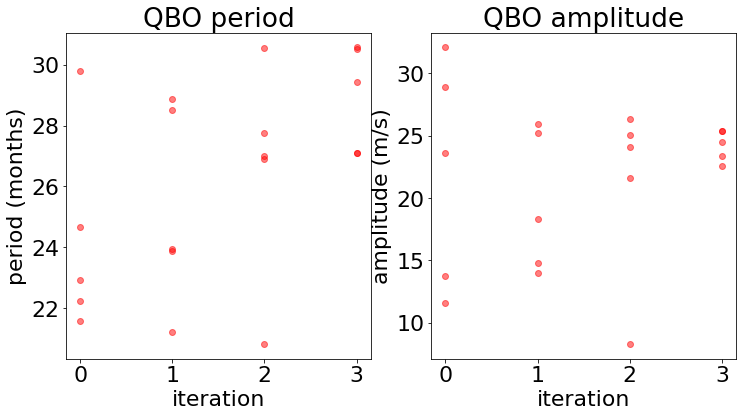

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

for i in range(N):
    plt.sca(ax[0])
    plt.plot(iter_ind[:n_its], QBO_arr[:, i, 0], 'o', color="red", alpha=0.5)
    plt.sca(ax[1])
    plt.plot(iter_ind[:n_its], QBO_arr[:, i, 1], 'o', color="red", alpha=0.5)

plt.sca(ax[0])
plt.title("QBO period")
plt.ylabel("period (months)")
#plt.axis(ymin=20, ymax=40)
plt.xlabel("iteration")
plt.sca(ax[1])
plt.title("QBO amplitude")
plt.ylabel("amplitude (m/s)")
plt.xlabel("iteration")
plt.savefig(f"{plotdir}/outputs_each_iteration_points_only.png")

## Animations

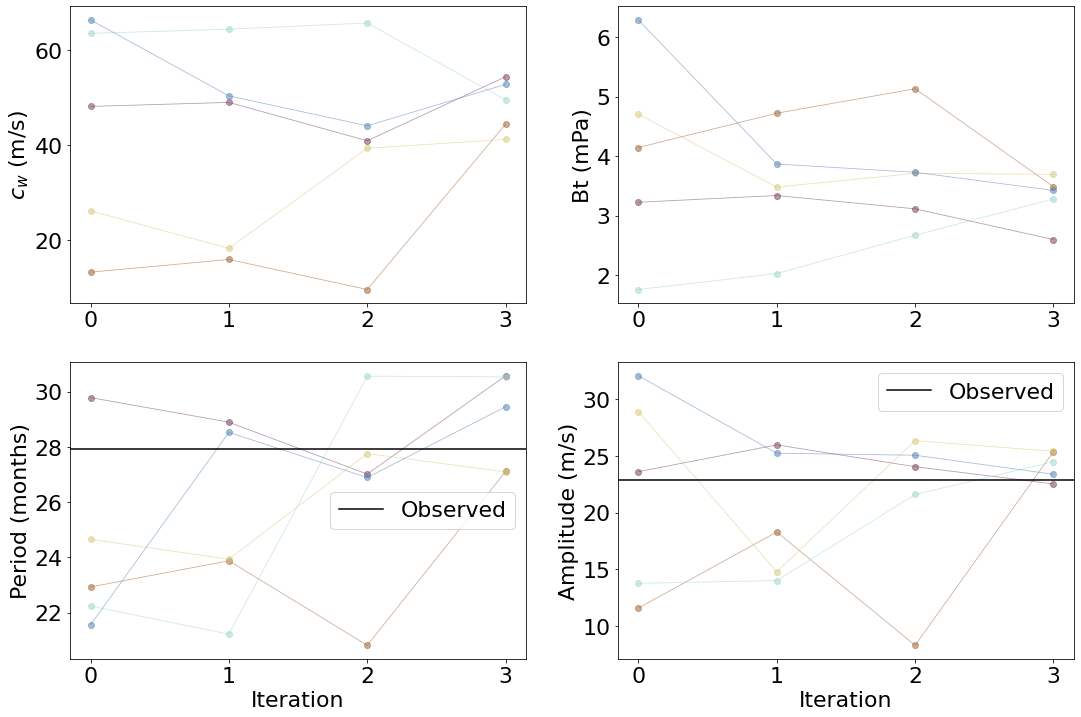

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
cmap = cm.romaO
norm = matplotlib.colors.Normalize(vmin=0, vmax=N)

for i in range(N):
    plt.sca(ax[0,0])
    plt.plot(iter_ind[:n_its], param_arr[:n_its, i, 0], 'o-', 
             color = cmap(norm(i)), alpha=0.5, lw=0.8)
    plt.sca(ax[0,1])
    plt.plot(iter_ind[:n_its], param_arr[:n_its, i, 1]*1e3, 'o-', 
             color = cmap(norm(i)), alpha=0.5, lw=0.8)
    plt.sca(ax[1,0])
    plt.plot(iter_ind[:n_its], QBO_arr[:, i, 0], 'o-', 
             color=cmap(norm(i)), alpha=0.5, lw=0.8)
    plt.sca(ax[1,1])
    plt.plot(iter_ind[:n_its], QBO_arr[:, i, 1], 'o-', 
             color=cmap(norm(i)), alpha=0.5, lw=0.8)


plt.sca(ax[0,0])
#plt.title("Half-width phase speed")
plt.ylabel("$c_w$ (m/s)")
#plt.xlabel("Iteration")
plt.sca(ax[0,1])
#plt.title("Gravity wave stress")
plt.ylabel("Bt (mPa)")
#plt.xlabel("Iteration")


plt.sca(ax[1,0])
#plt.title("QBO period")
plt.axhline(QBO_period_truth, color='k', linestyle='-', label="Observed")
#plt.axhline(QBO_period_truth+QBO_period_sd, color='k', linestyle='--', label="1 s.d.")
#plt.axhline(QBO_period_truth-QBO_period_sd, color='k', linestyle='--')

plt.ylabel("Period (months)")
#plt.axis(ymin=20, ymax=40)
plt.xlabel("Iteration")
plt.legend()

plt.sca(ax[1,1])
#plt.title("QBO amplitude")
plt.axhline(QBO_amp_truth, color='k',  linestyle='-', label="Observed")
#plt.axhline(QBO_amp_truth+QBO_amp_sd, color='k', linestyle='--', label="1 s.d.")
#plt.axhline(QBO_amp_truth-QBO_amp_sd, color='k', linestyle='--')

plt.ylabel("Amplitude (m/s)")
plt.xlabel("Iteration")
plt.legend()
plt.savefig(f"{plotdir}/parameters_and_outputs_each_iteration.png")


<Figure size 432x288 with 0 Axes>

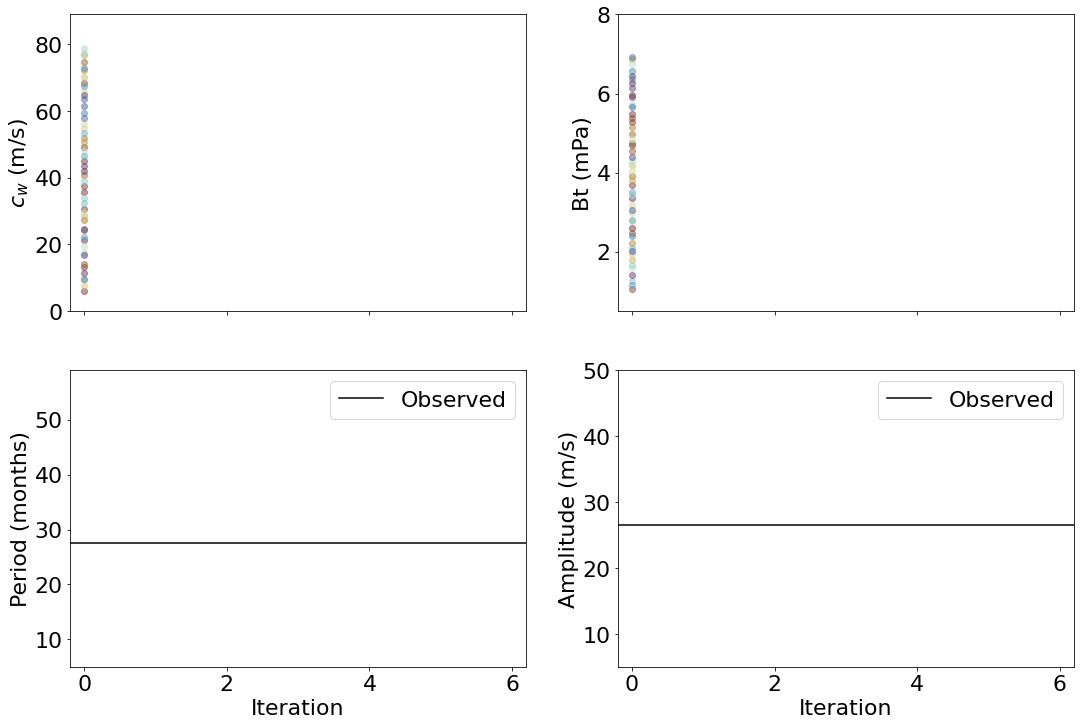

In [20]:

plt.clf()
fig, ax = plt.subplots(2, 2, figsize=(18, 12), sharex=True)

cmap = cm.romaO
norm = matplotlib.colors.Normalize(vmin=0, vmax=N)

for i in range(N):
    plt.sca(ax[0,0])
    plt.plot(iter_ind[:1], param_arr[:1, i, 0], 'o-', 
             color = cmap(norm(i)), alpha=0.5, lw=0.8)
    plt.sca(ax[0,1])
    plt.plot(iter_ind[:1], param_arr[:1, i, 1]*1e3, 'o-', 
             color = cmap(norm(i)), alpha=0.5, lw=0.8)

plt.axis(xmin=-0.2, xmax=n_its-1+0.2)
plt.sca(ax[0,0])
#plt.title("Half-width phase speed")
plt.ylabel("$c_w$ (m/s)")
plt.axis(ymin=0, ymax=89)

#plt.xlabel("Iteration")
plt.sca(ax[0,1])
#plt.title("Gravity wave stress")
plt.ylabel("Bt (mPa)")
plt.axis(ymin=0.5, ymax=8)

#plt.xlabel("Iteration")


plt.sca(ax[1,0])
#plt.title("QBO period")
plt.axhline(QBO_period_truth, color='k', linestyle='-', label="Observed")
#plt.axhline(QBO_period_truth+QBO_period_sd, color='k', linestyle='--', label="1 s.d.")
#plt.axhline(QBO_period_truth-QBO_period_sd, color='k', linestyle='--')
plt.axis(ymin=5, ymax=59)

plt.ylabel("Period (months)")
#plt.axis(ymin=20, ymax=40)
plt.xlabel("Iteration")
plt.legend()

plt.sca(ax[1,1])
#plt.title("QBO amplitude")
plt.axhline(QBO_amp_truth, color='k',  linestyle='-', label="Observed")
#plt.axhline(QBO_amp_truth+QBO_amp_sd, color='k', linestyle='--', label="1 s.d.")
#plt.axhline(QBO_amp_truth-QBO_amp_sd, color='k', linestyle='--')
plt.axis(ymin=5, ymax=50)
plt.ylabel("Amplitude (m/s)")
plt.xlabel("Iteration")
plt.legend()
plt.savefig(f"{plotdir}/parameters_and_outputs_iter_params_only.png")


<Figure size 432x288 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

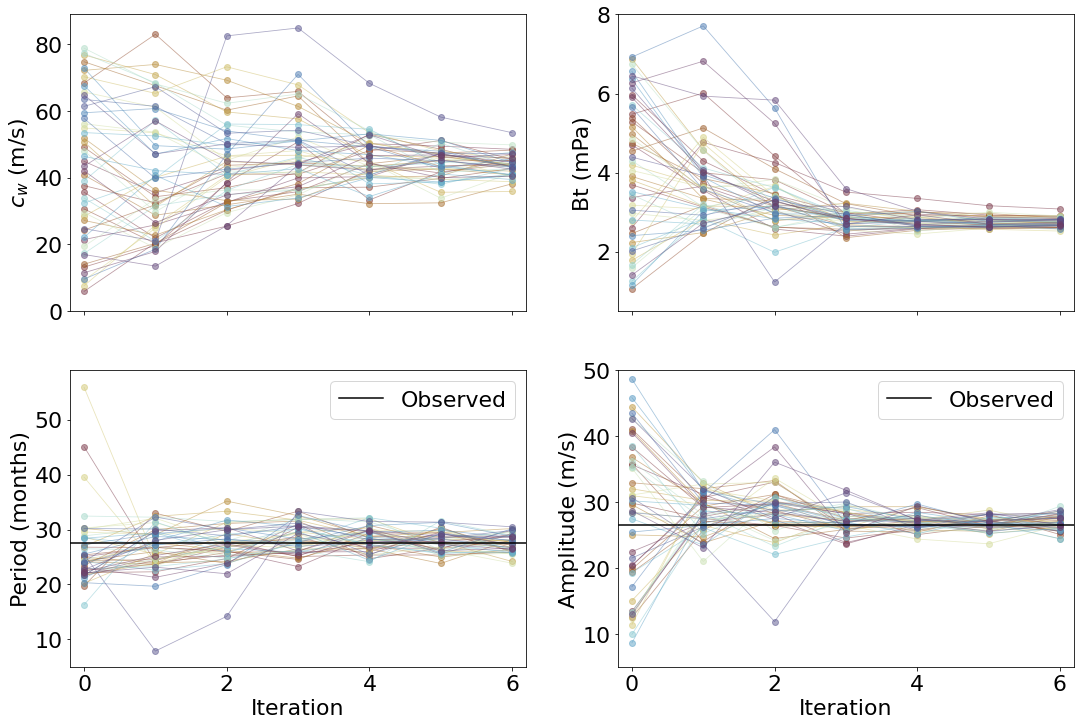

In [21]:
for it in range(n_its):
    plt.clf()
    fig, ax = plt.subplots(2, 2, figsize=(18, 12), sharex=True)

    cmap = cm.romaO
    norm = matplotlib.colors.Normalize(vmin=0, vmax=N)

    for i in range(N):
        plt.sca(ax[0,0])
        plt.plot(iter_ind[:it+1], param_arr[:it+1, i, 0], 'o-', 
                 color = cmap(norm(i)), alpha=0.5, lw=0.8)
        plt.sca(ax[0,1])
        plt.plot(iter_ind[:it+1], param_arr[:it+1, i, 1]*1e3, 'o-', 
                 color = cmap(norm(i)), alpha=0.5, lw=0.8)
        plt.sca(ax[1,0])
        plt.plot(iter_ind[:it+1], QBO_arr[:it+1, i, 0], 'o-', 
                 color=cmap(norm(i)), alpha=0.5, lw=0.8)
        plt.sca(ax[1,1])
        plt.plot(iter_ind[:it+1], QBO_arr[:it+1, i, 1], 'o-', 
                 color=cmap(norm(i)), alpha=0.5, lw=0.8)

    plt.axis(xmin=-0.2, xmax=n_its-1+0.2)
    plt.sca(ax[0,0])
    #plt.title("Half-width phase speed")
    plt.ylabel("$c_w$ (m/s)")
    plt.axis(ymin=0, ymax=89)

    #plt.xlabel("Iteration")
    plt.sca(ax[0,1])
    #plt.title("Gravity wave stress")
    plt.ylabel("Bt (mPa)")
    plt.axis(ymin=0.5, ymax=8)

    #plt.xlabel("Iteration")


    plt.sca(ax[1,0])
    #plt.title("QBO period")
    plt.axhline(QBO_period_truth, color='k', linestyle='-', label="Observed")
    #plt.axhline(QBO_period_truth+QBO_period_sd, color='k', linestyle='--', label="1 s.d.")
    #plt.axhline(QBO_period_truth-QBO_period_sd, color='k', linestyle='--')
    plt.axis(ymin=5, ymax=59)

    plt.ylabel("Period (months)")
    #plt.axis(ymin=20, ymax=40)
    plt.xlabel("Iteration")
    plt.legend()

    plt.sca(ax[1,1])
    #plt.title("QBO amplitude")
    plt.axhline(QBO_amp_truth, color='k',  linestyle='-', label="Observed")
    #plt.axhline(QBO_amp_truth+QBO_amp_sd, color='k', linestyle='--', label="1 s.d.")
    #plt.axhline(QBO_amp_truth-QBO_amp_sd, color='k', linestyle='--')
    plt.axis(ymin=5, ymax=50)

    plt.ylabel("Amplitude (m/s)")
    plt.xlabel("Iteration")
    plt.legend()
    plt.savefig(f"{plotdir}/parameters_and_outputs_iter_{it}.png")
